# Data analysis and model building

Simple ml model for predicting diamonds prices on dataset "diamonds" from seaborn library



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from scipy.stats import uniform,randint

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error



In [3]:
df = sns.load_dataset('diamonds')
df


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Sprawdzenie typów zmiennych i podstawowych statystyk datasetu

In [4]:

print(df.info())

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Sprawdzenie brakujących danych  
Na szczescie nie ma brakujacych danych, problem z głowy

In [5]:
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


Podejrzewam że zmienne x,y,z są silnie zależne od carat

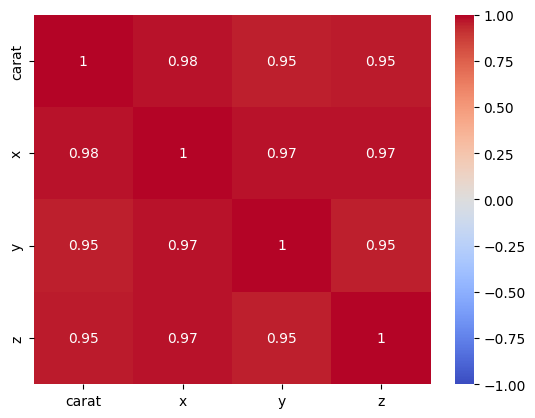

In [5]:

sns.heatmap(df[["carat",'x','y','z']].corr(), annot = True, cmap='coolwarm',vmin=-1)
plt.show()


Usuwam niepotrzebne zmienne x y z

In [6]:

df = df.drop(["y",'z','x'], axis='columns')


Sprawdzenie korelacji pomiędzy pozostałymi zmiennymi ciągłymi

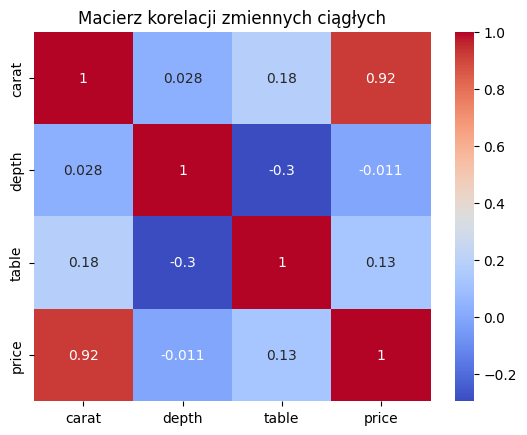

In [7]:

sns.heatmap(df[["carat",'depth','table','price']].corr(), annot=True, cmap='coolwarm')
plt.title('Macierz korelacji zmiennych ciągłych')
plt.show()


Sprawdzenie zależności zmiennych ciągłych od siebie na wzajem, na glownej przekątnej rozkład zmiennej  
Widać że cena jest najbardziej związana ze zmienną carat, być może zależność jest kwadratowa

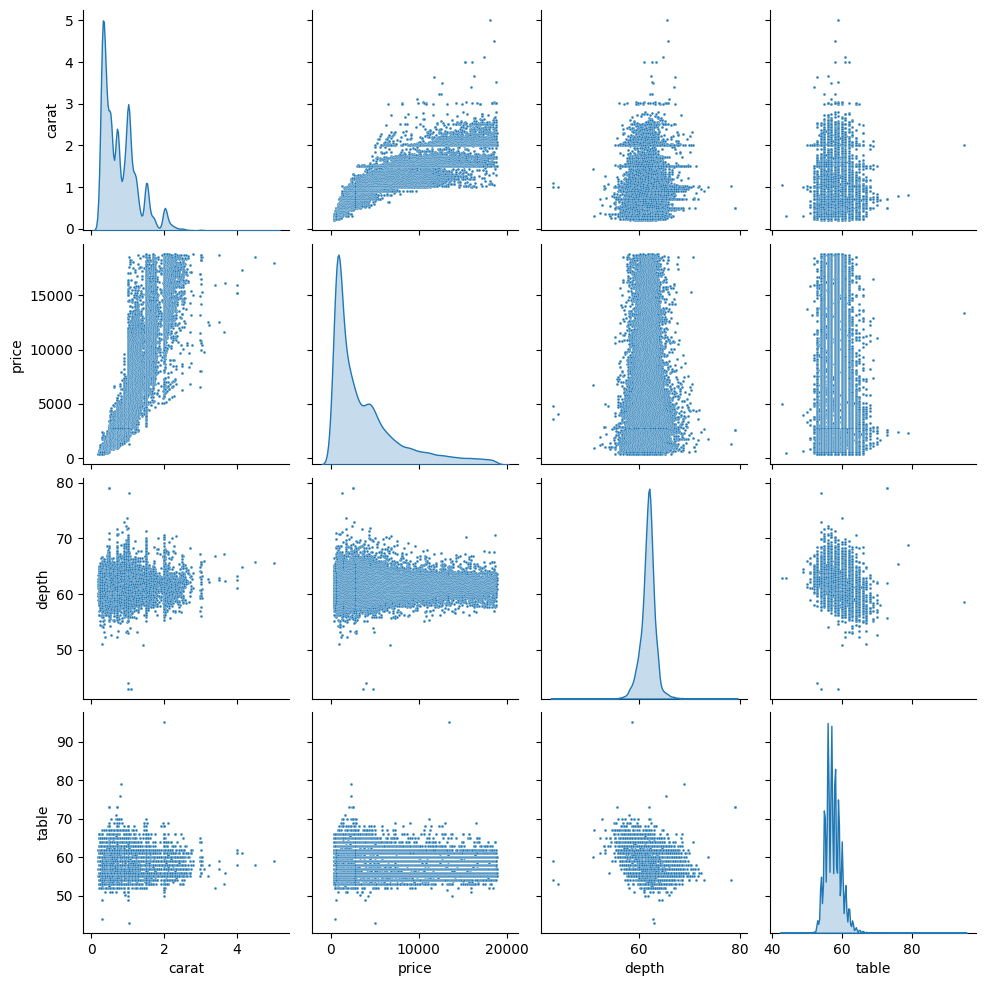

In [8]:
sns.pairplot(df, vars = ['carat', 'price', 'depth', 'table'], diag_kind="kde", plot_kws={"s": 4})
plt.show()

Rozkład zmiennych kategorycznych

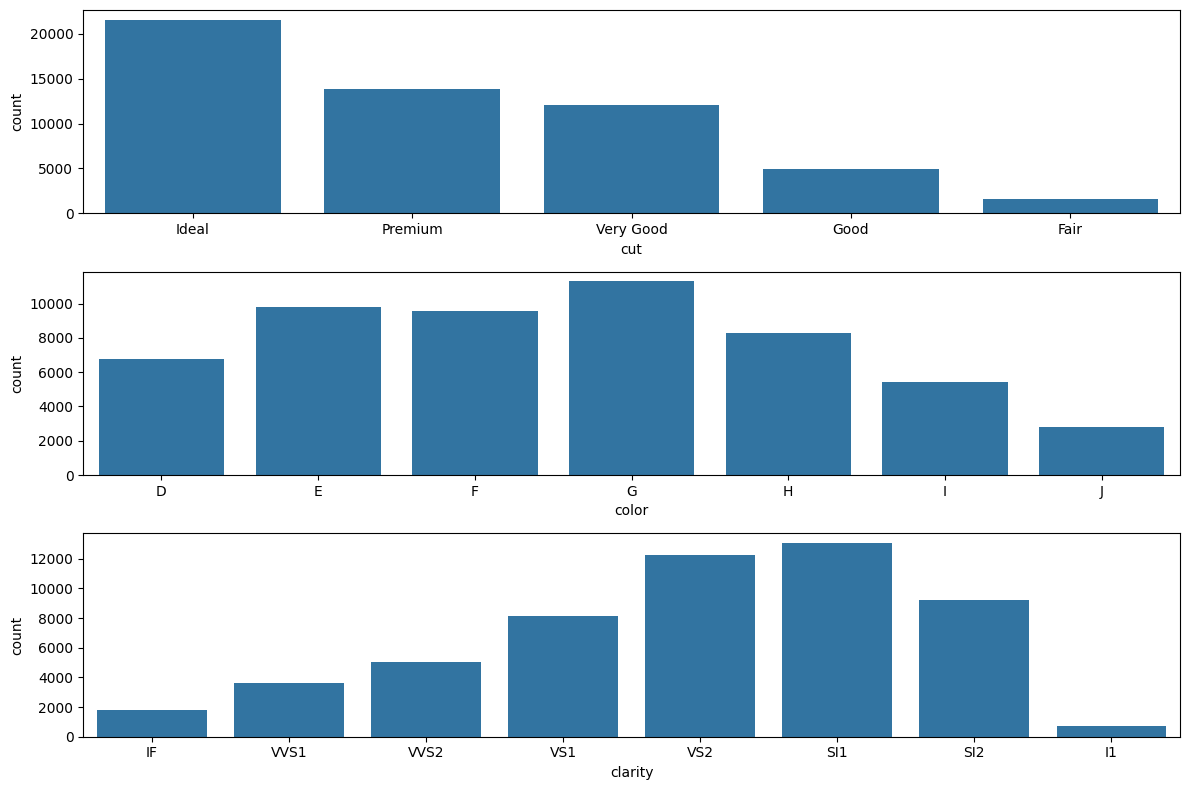

In [10]:
plt.figure(figsize =(12,8))
plt.subplot(3,1,1)
sns.countplot(df,x = "cut")
plt.subplot(3,1,2)
sns.countplot(df,x = "color")
plt.subplot(3,1,3)
sns.countplot(df,x = "clarity")
plt.tight_layout()
plt.show()

Wizualizacja zależności między zmienną docelową a zmiennymi kategorycznymi  
zmiana na logarytm, aby zmniejszyć wpływ outlierow

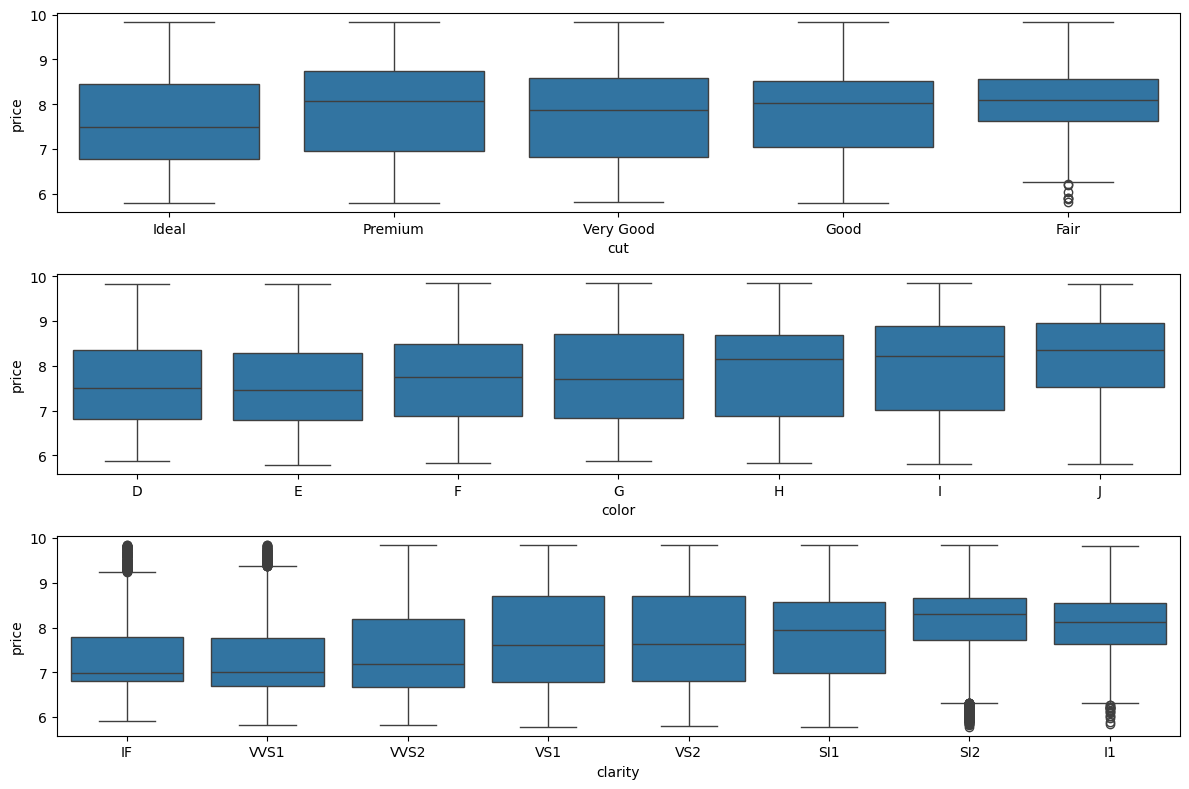

In [11]:

dflog = df.copy()
dflog['price'] = np.log(dflog['price']) 

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.boxplot(dflog,x='cut', y='price')
plt.subplot(3, 1, 2)
sns.boxplot(dflog,x='color', y='price')
plt.subplot(3, 1, 3)
sns.boxplot(dflog,x='clarity', y='price')
plt.tight_layout()
plt.show()




 Wybór modelu ML do przewidywania ceny diamentu  


 Ponieważ target jest zmienną ciągłą przetestuję :
 regresję wielomianową,
 random forest regressor,
 gradient boosting regressor i
 sieć neuronową

 Będę oceniał wydajność tych modeli metrykami MAE(srednia roznica w cenie) 
 i Mean Percentage Error (procentowa skala bledu, co przy przewidywaniu ceny może być istotne)

 (MSE nie wydaje się być najlepszą metryką do tego problemu)
    <br>

Kodowanie zmiennych kategorycznych

In [12]:

df_encoded = pd.get_dummies(df,columns=['cut', 'color', 'clarity'], drop_first=True)

Podział datasetu na treningowy i testowy

In [13]:

train, test = train_test_split(df_encoded, test_size=0.2, random_state=50)

x_train = train.drop('price', axis=1)
y_train = train['price']

x_test = test.drop('price', axis=1)
y_test = test['price']

Regresja wielomianowa

In [14]:

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)

LinearR = LinearRegression()
LinearR.fit(x_train_poly,y_train)

x_test_poly = poly.transform(x_test)
y_pred1 = LinearR.predict(x_test_poly)

In [15]:
# Ocena
print(mean_absolute_error(y_test,y_pred1))
print(mean_absolute_percentage_error(y_test,y_pred1))

486.49089754082655
0.23543951856803094


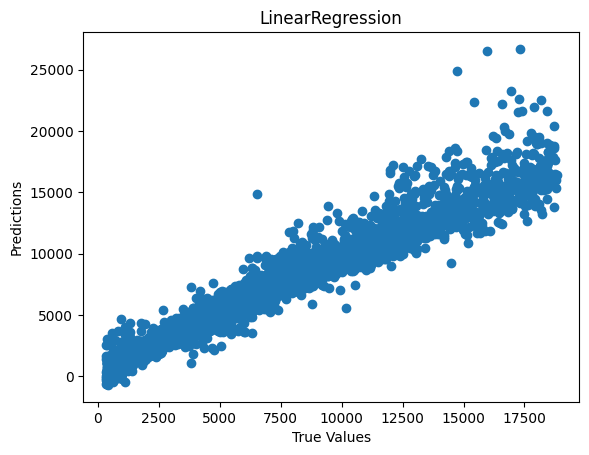

In [16]:
plt.scatter(y_test, y_pred1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title("LinearRegression")
plt.show()

Random Forest Regressor 

In [17]:
# {'max_depth': 17,
 #'min_samples_leaf': 10,
 #'min_samples_split': 17,
 #'n_estimators': 24}

#  dostosowanie parametrów
RandomF = RandomForestRegressor()
param_dist = {
    'n_estimators':randint(10, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}
search = RandomizedSearchCV(RandomF, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_absolute_percentage_error', random_state=42)
search.fit(x_train, y_train)
search.best_params_




{'max_depth': 17,
 'min_samples_leaf': 10,
 'min_samples_split': 17,
 'n_estimators': 24}

In [18]:
# stworzenie modelu optymalnymi parametrami i ocena
RandomF = RandomForestRegressor(max_depth=17,min_samples_leaf=10,min_samples_split=17,n_estimators=24)
RandomF.fit(x_train,y_train)
y_pred2 = RandomF.predict(x_test)
print(mean_absolute_error(y_pred2,y_test))
print(mean_absolute_percentage_error(y_pred2,y_test))

304.0206509164165
0.08293866846403197


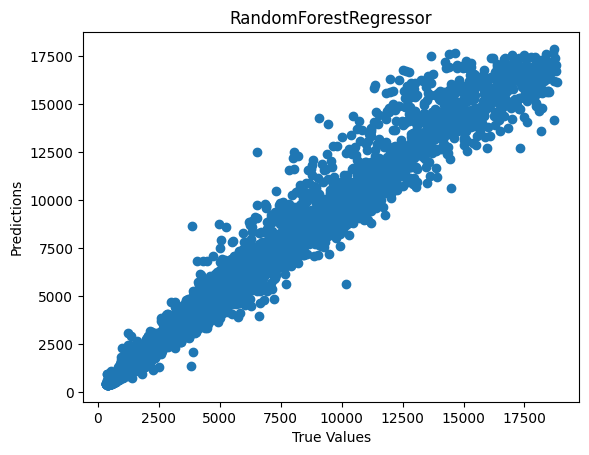

In [19]:
plt.scatter(y_test, y_pred2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title("RandomForestRegressor")
plt.show()

GradientBoostingRegressor

In [20]:

# {'learning_rate': 0.1,
# 'max_depth': 9,
# 'min_samples_leaf': 3,
# 'min_samples_split': 4,
# 'n_estimators': 137}

# tuning parametrów

GradientB = GradientBoostingRegressor()
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
}

search = RandomizedSearchCV(GradientB, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_absolute_percentage_error', random_state=42)
search.fit(x_train, y_train)
search.best_params_




{'learning_rate': 0.1,
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 137}

In [21]:
#Stworzenie modelu z optymalnymiparametrami i ocena

GradientB = GradientBoostingRegressor(learning_rate=0.1,max_depth=9,min_samples_leaf=3,min_samples_split=4,n_estimators=137)
GradientB.fit(x_train,y_train)
y_pred3 = GradientB.predict(x_test)
print(mean_absolute_error(y_pred3,y_test))
print(mean_absolute_percentage_error(y_pred3,y_test))


280.0061226370243
0.07440914555580767


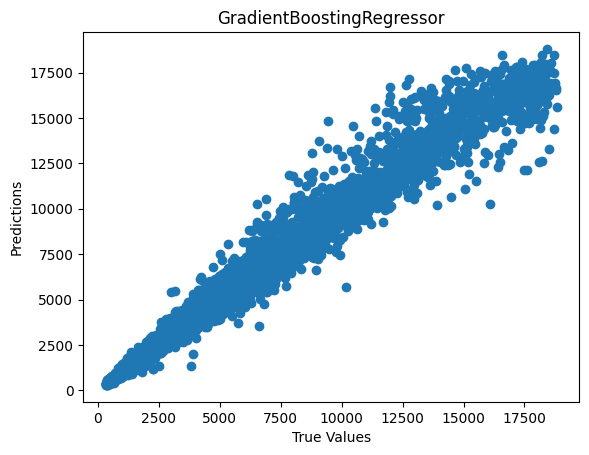

In [22]:
plt.scatter(y_test, y_pred3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title("GradientBoostingRegressor")
plt.show()

Sieć neuronowa 

In [24]:


# Skalowanie zmiennych
s = StandardScaler()
x_train_scaled = s.fit_transform(x_train)
x_test_scaled = s.transform(x_test)

#Stworzenie modelu 
neuralNetwork = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

neuralNetwork.fit(x_train_scaled,y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [25]:
#predykcja i błędy

y_pred4 = neuralNetwork.predict(x_test_scaled)
print(mean_absolute_error(y_test,y_pred1))
print(mean_absolute_percentage_error(y_test,y_pred4))

486.49089754082655
0.08585001870365998


In [ ]:
plt.scatter(y_test, y_pred4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title("Neural Nertwork")
plt.show()

Podsumowując najlepiej wypadł Gradient Boosting Regressor